In [31]:
import pandas as pd
import matplotlib.pyplot as plt

Files in '/Users/asaf.lev/HW1-Solution': ['Assignent 1 - Solution.ipynb', 'abb_nyc_data.csv', '.ipynb_checkpoints']


In [32]:
df = pd.read_csv('abb_nyc_data.csv')
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'district', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price_per_night',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [33]:
#5
rows, cols = df.shape
print(f'Number of Rows: {rows}')
print(f'Number of Rows: {cols}')

Number of Rows: 48895
Number of Rows: 16


In [34]:
#6
df.iloc[3:9]['neighbourhood']

3          Clinton Hill
4           East Harlem
5           Murray Hill
6    Bedford-Stuyvesant
7        Hell's Kitchen
8       Upper West Side
Name: neighbourhood, dtype: object

In [35]:
#7
df['room_type'].nunique()

3

In [36]:
#8
df_over_1000 = df[df['price_per_night'] > 1000]
print(df_over_1000.shape[0])

239


In [37]:
#9
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'].max()

/var/folders/w9/wk5b2m1x7gb_4k9hx1cjj5vc0000gp/T/ipykernel_6985/4001210361.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['last_review'] = pd.to_datetime(df['last_review'])


Timestamp('2019-12-06 00:00:00')

In [38]:
#10
df['price_per_night'].std()

240.15416974718727

In [39]:
#11
df['number_of_reviews'].min()

0

In [40]:
#12
df['latitude'].max() # Means further away from the eqautor

40.91306

In [41]:
#13
df['availability_365'].mean()

112.78132733408324

In [42]:
#14
df['number_of_reviews'].sum()

1138005

In [43]:
#16+17
df['district'].value_counts()
# Queen Answer is 5666
# Most popular Manhattan
#Least popular Staten Island

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: district, dtype: int64

In [44]:
#18
df_for_plot = df[(df['price_per_night']>1000) & (df['price_per_night']<5000) ]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f83a171f790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f83a171fcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83a171f4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f83913b0250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f83913b04f0>],
 'means': []}

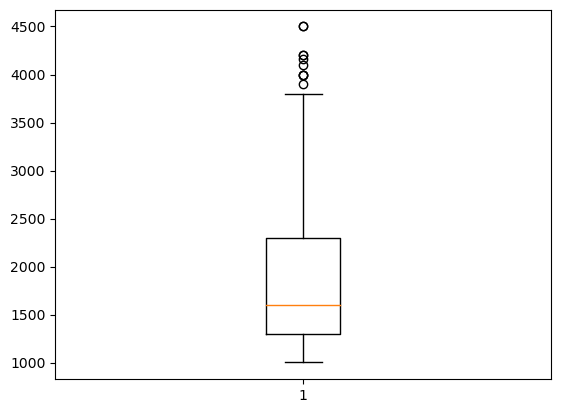

In [45]:
#19
plt.boxplot(df_for_plot['price_per_night'])
# Horizontal line below - Q1 - 1.5IQR (Q3-Q1) -> "Minimum" -> below this outliers
# Horizontal line Above - Q3 + 1.5IQR (Q3-Q1)-> "Maximum" -> above this outliers
# Horizontal line in the box - Q2 / Median

(array([64., 48., 42.,  8., 17., 15.,  2.,  7.,  5.,  5.]),
 array([1002. , 1351.8, 1701.6, 2051.4, 2401.2, 2751. , 3100.8, 3450.6,
        3800.4, 4150.2, 4500. ]),
 <BarContainer object of 10 artists>)

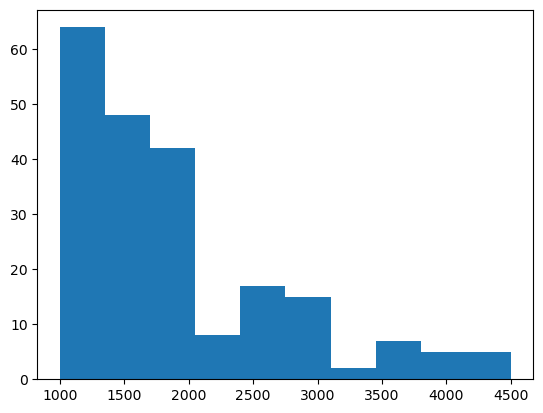

In [46]:
#20
plt.hist(df_for_plot['price_per_night'])

<Axes: title={'center': 'Number of Reviews by Room Type'}, xlabel='Room Type', ylabel='Number of Reviews'>

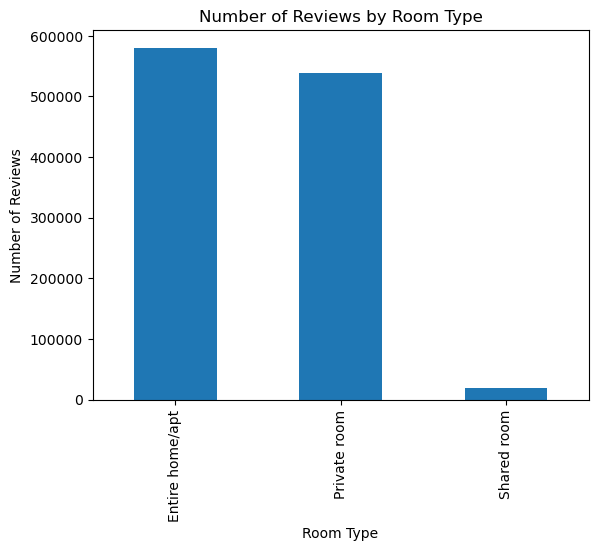

In [47]:
#21
grouped_by_room_type = df.groupby('room_type')['number_of_reviews'].sum()
grouped_by_room_type.plot(kind='bar',
                       xlabel='Room Type',
                       ylabel='Number of Reviews',
                       title='Number of Reviews by Room Type'
)